# Kényszerkielégítés

Mi a különbség az általános fakeresési valamint a kényszer-kielégítési probléme között?

Általános keresési probléma
    Az állapot egy fekete doboz
    Az állapotot bármilyen adatstruktúra ábrázolhatja
    Csak az állapotátmenetek, heurisztika és célállapot legyen implementálva

Késnyszerkieégítési probléma
    Az állapotot Di taerományból származó Xi változókkal definiáljuk
    A célteszt kényszerek halmaza, mely mindegyike a változók egy részhalmazát és megfelelő értékeket tartalmazza



Pl az Ausztrál térképes példa
változók: WA, NT, Q, NSW, V, SA, T
tartoményok: Di={piros,zöld,kék}
kényszerek: szomszédos tartomány nem lehet ugyanolyan színű

A gráfszínezéses probléma, az egy NP teljes probléma, azaz nincs ismert polinomiális idpben futó algoritmus a megoldására.

In [7]:
#Képezzük le gráfra Ausztráliát
graph = [[0,1,1,0,0,0],
         [1,0,1,1,1,1],
         [1,1,0,1,1,1],
         [0,1,1,0,1,0],
         [0,1,1,1,0,1],
         [0,1,1,0,1,0]]

# Az első sor az első gráp csomópont
# [Nem kapcsolódik önmagához, kapcsolódik a második csomóponthoz,..., nem kapcsolódik az utolsó csomóponthoz]

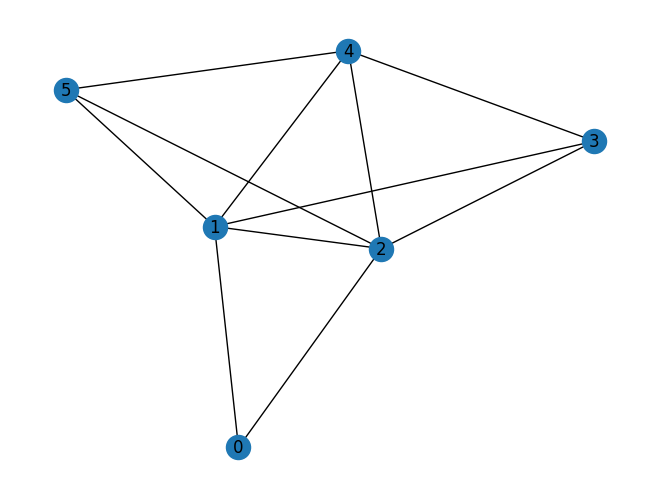

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in range(len(graph)):
    for j in range(i+1,len(graph)):
        if graph[i][j]:
            G.add_edge(i,j)

pos = nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [9]:
def is_safe(graph, color, v, c):

    for i in range(len(graph)):
        if graph[v][i] and c == color[i]:
            return False
    return True

In [10]:
def backtracking(graph, graf_colors, v, colors):
    """
    Ez a függv rekurzívan meghívja önmagát minden csúcsra és megrpóbálja kiválasztani a színeket
    Ha egy adott szín nem biztonságos, mert már használják a szomszédos csúcson, akkor megpróbál egy másikat
    Ha egyik szín sem biztonságos, akkor visszalép és megpróbálja újraszínezni az előző csúcsot
    """
    # Megvizsgájuk, hogy melyik elemnél vagyunk
    if v == len(graph):
        return True

    # Próbáljuk végig a színezést
    for c in range(colors):
        # Ha kiszínezhető  'v' csúcs a 'c' színnel
        if is_safe(graph, graf_colors, v, c):

            # Szíenezzük ki a 'v' csúcsot a 'c' színnel
            graf_colors[v] = c

            # Szímezzük ki a következő csúcsot
            if backtracking(graph, graf_colors, v+1, colors):
                return True
            
            # Ha nem sikerül visszalépünk ls az aktuálisan kiszínezett csúcsot '-1'-re azaz szín nélkülire állítjuk
            graf_colors[v] = -1
    
    return False

In [11]:
def graph_coloring(graph, colors):
    # Mennyi csúcsból áll a gráfunk?
    n = len(graph)

    # Hozzunk létre egy üres listát jelöli a gráf elemeit és nincs kiszínezve egyetlen ekene sem.
    # Jelölje '-1' Ha nincs kiszínezve az elem.
    graf_colors = [-1] * n

    # Az első gráf elemet színezzük ki a 0 színnel
    graf_colors[0] = 0

    # Színezzük ki a gráfot
    if not backtracking(graph, graf_colors, 0, colors):
        return None

    # Térjünk vissza a kiszínezett gráffal
    return graf_colors

In [12]:
colors = 4
coloring = graph_coloring(graph, colors)

if coloring:
    print("A gráf színezése: ", coloring)
else:
    print("Nem találtam megoldást a megadott színekkel")

A gráf színezése:  [0, 1, 2, 0, 3, 0]


In [ ]:
def is_safe_csp(graph, colors):
    """Ellenőrzi, hogy van e két azonos szín a szomszédban"""
    for i in range(len(graph)):
        for j in range(i+1,len(graph)):
            if graph[i][j] and colors[j] == colors[i]:
                return False
    return True

In [ ]:
def grapg_coloring_csp(graph, colors, v, graf_colors):
    """Megpróbálja beszínezni az összes csomópontot a c szín valamelyikével.
    Ha sikerül, akkor teljesül az élkonzisztencia."""
    
    # Megvizsgájuk, hogy melyik elemnél vagyunk
    if v == len(graph):
        
        # Ha igaz, akkor mindenhol tudtunk színezni
        if is_safe_csp(graph, graf_colors):
            print(graf_colors)
            return True
        
        # Ha hamis, akkor nem oldható meg a probléma
        else:
            return False
    
    # Rekurzívan bejárjuk a gráfot
    for j in range(0, colors):
        graf_colors[v] = j
        if grapg_coloring_csp(graph, colors, v+1, graf_colors):
            return True
        graf_colors[v] = -1
        